In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
import tempfile

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

c:\users\rvardhineni\appdata\local\continuum\anaconda2\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import tensorflow as tf

In [3]:
table = pd.read_excel('Avon_Data.xlsx')

In [4]:
table.columns

Index(['cv__Campaign__r.Name', 'Year', 'City', 'Walk_Participation',
       'Walk_Status', 'Classification', 'FUL_CHECKED',
       'cv__Registration_Date__c', 'Withdrew', 'Active',
       'Registration_Days_Out', 'Opportunity_Amount', 'AF_PROMO__c',
       'AF_REG_WAY_OF_ENTRY__c', 'AF_REG_SOURCE__c', 'AF_REG_SOURCE_DETAIL__c',
       'AF_LEAD_GENERATED_DATE__c', 'AF_LEAD_SOURCE__c',
       'AF_LEAD_SUBSOURCE__c', 'Age_During_Event__c', 'cv__Team__r.Name',
       'Total_Raised_Master'],
      dtype='object')

In [5]:
table_df = pd.DataFrame(table)

In [6]:
filter_data=table_df[table_df['Year']!= 2009]

In [7]:
filter_data=filter_data[table_df['Year']!= 2017]

c:\users\rvardhineni\appdata\local\continuum\anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [8]:
filter_data

,cv__Campaign__r.Name,Year,City,Walk_Participation,Walk_Status,Classification,FUL_CHECKED,cv__Registration_Date__c,Withdrew,Active,...,AF_PROMO__c,AF_REG_WAY_OF_ENTRY__c,AF_REG_SOURCE__c,AF_REG_SOURCE_DETAIL__c,AF_LEAD_GENERATED_DATE__c,AF_LEAD_SOURCE__c,AF_LEAD_SUBSOURCE__c,Age_During_Event__c,cv__Team__r.Name,Total_Raised_Master
1,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-04,0,1,...,NaN,Web Site,Unknown,NaN,NaT,Other,NaN,23.0,Cure-vaceous Cuties,1695.0
2,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-02-12,0,1,...,NaN,Phone/Local Office,Unknown,NaN,2009-10-05,Email,NaN,57.0,NaN,500.0
3,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-03,0,1,...,NaN,Web Site,Email,NaN,NaT,Email,NaN,NaN,NaN,0.0
4,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-02,0,1,...,NaN,Web Site,Email,NaN,NaT,Email,NaN,48.0,NaN,0.0
5,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-06,0,1,...,NaN,Web Site,Outreach,NaN,NaT,Outreach,NaN,43.0,NaN,0.0
6,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-02-15,0,1,...,NaN,Phone/Local Office,Unknown,NaN,2010-01-06,Internet,Internet: Search Engine,22.0,NaN,190.0
7,2010 Boston,2010,Boston,Crew,Active,Crew,0,2010-01-07,0,1,...,NaN,Web Site,TV,Cable: Food Network,NaT,TV,TV: CABLE Food Network,NaN,NaN,0.0
8,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-09,0,1,...,NaN,Web Site,Email,NaN,NaT,Email,NaN,37.0,NaN,0.0
9,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-13,0,1,...,IM2010,Phone/Local Office,Friend/Family/Acquaintance,NaN,2010-01-09,Friend/Family/Acquaintance,NaN,58.0,Fran's Clan,975.0
10,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-13,0,1,...,IM2010,Phone/Local Office,Outreach,NaN,2010-01-11,Outreach,NaN,62.0,Fran's Clan,575.0


In [9]:
filter_data.corr()

,Year,FUL_CHECKED,Withdrew,Active,Registration_Days_Out,Opportunity_Amount,Age_During_Event__c,Total_Raised_Master
Year,1.000000,-0.042309,0.047094,-0.047182,0.155497,-0.349989,0.110660,-0.011166
FUL_CHECKED,-0.042309,1.000000,-0.520876,0.520924,-0.014307,0.026312,0.084612,0.401703
Withdrew,0.047094,-0.520876,1.000000,-0.999911,0.094323,-0.047162,0.028246,-0.227428
Active,-0.047182,0.520924,-0.999911,1.000000,-0.094300,0.047221,-0.028267,0.227452
Registration_Days_Out,0.155497,-0.014307,0.094323,-0.094300,1.000000,-0.283035,0.147164,-0.029370
Opportunity_Amount,-0.349989,0.026312,-0.047162,0.047221,-0.283035,1.000000,-0.045473,0.019594
Age_During_Event__c,0.110660,0.084612,0.028246,-0.028267,0.147164,-0.045473,1.000000,0.091170
Total_Raised_Master,-0.011166,0.401703,-0.227428,0.227452,-0.029370,0.019594,0.091170,1.000000


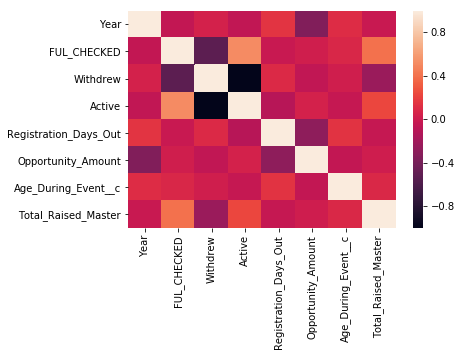

In [10]:
sns.heatmap(filter_data.corr())

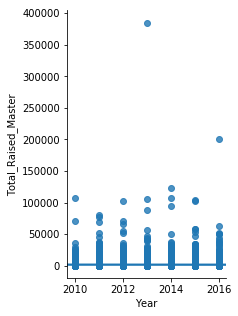

In [11]:
sns.pairplot(filter_data, x_vars=['Year'], y_vars='Total_Raised_Master', size=4.5, aspect=0.7, kind='reg')

In [231]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [232]:
# X = filter_data[["Year", "City", "Classification", "Walk_Status", 
#               "Opportunity_Amount", "AF_PROMO__c", "AF_REG_WAY_OF_ENTRY__c", 
#               "AF_REG_SOURCE__c", "AF_LEAD_SOURCE__c"]]

In [233]:
# V = filter_data[["Registration_Days_Out","Age_During_Event__c"]].fillna(0)

In [234]:
# le = preprocessing.LabelEncoder()

# X1 = X.apply(le.fit_transform)
# X1.head()

In [235]:
#frames = [X1, V]

In [236]:
#X1.shape

In [237]:
#V.shape

In [238]:
#combined_data = pd.concat(frames, axis = 1)

In [239]:
#frames

In [240]:
#results = list(combined_data)
#results

In [241]:
filter_data["Total_Raised_Master"].shape

(159471,)

In [242]:
# #standardizing output variable

# min_max_scaler = preprocessing.MinMaxScaler()
# minmax = min_max_scaler.fit_transform(filter_data["Total_Raised_Master"])
# minmax

In [243]:
#results = list(combined_data)
#model_summary = []

#for i in results:
#    X = combined_data[i]
#    Y = minmax
#    x = np.asarray(X)
#    y = np.asarray(Y)
#    model = smf.OLS(y,x).fit()
#    print i
#    if "R-squared:" in str(model.summary()):
#        print str(model.summary())[198:240]

In [244]:
filter_data["AF_LEAD_SOURCE__c"].unique()

array(['Other', 'Email', 'Outreach', 'Internet', 'TV',
       'Friend/Family/Acquaintance', 'Mail or Postcard', nan, 'Radio',
       'Unknown', 'Magazine', 'Bus or Train Location',
       'Store Display (POP)', 'Bus or Train', 'Newspaper Ad',
       'Community Involvement', 'On Event', "BRC Add'l Name",
       'Local Print', 'Direct Mail or Postcard', 19, 'Subway/Train',
       'Shopping Mall', 'Mail', -1, 'Movie Theater', 'Pandora',
       'Store Display', 'Community Event', 'None',
       'Internet Search Engine', 'TV Ad', 'my sister is walking'], dtype=object)

In [245]:
filter_data["AF_LEAD_SOURCE__c"].isnull().values.any()

True

In [246]:
filter_data.head()

,cv__Campaign__r.Name,Year,City,Walk_Participation,Walk_Status,Classification,FUL_CHECKED,cv__Registration_Date__c,Withdrew,Active,...,AF_PROMO__c,AF_REG_WAY_OF_ENTRY__c,AF_REG_SOURCE__c,AF_REG_SOURCE_DETAIL__c,AF_LEAD_GENERATED_DATE__c,AF_LEAD_SOURCE__c,AF_LEAD_SUBSOURCE__c,Age_During_Event__c,cv__Team__r.Name,Total_Raised_Master
1,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-04,0,1,...,NaN,Web Site,Unknown,NaN,NaT,Other,NaN,23.0,Cure-vaceous Cuties,1695.0
2,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-02-12,0,1,...,NaN,Phone/Local Office,Unknown,NaN,2009-10-05,Email,NaN,57.0,NaN,500.0
3,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-03,0,1,...,NaN,Web Site,Email,NaN,NaT,Email,NaN,NaN,NaN,0.0
4,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-02,0,1,...,NaN,Web Site,Email,NaN,NaT,Email,NaN,48.0,NaN,0.0
5,2010 Boston,2010,Boston,Crew,Active,Crew,1,2010-01-06,0,1,...,NaN,Web Site,Outreach,NaN,NaT,Outreach,NaN,43.0,NaN,0.0


In [247]:
unknown_values = ['Unknown', 'nan','NaN','NA', 'None', '--None--', 'NaN']
column_values =  list(filter_data)

In [248]:
# percentage = []
# missing_values = []
# features = []

# def convert_all_nas(df):
#     df=df.replace(unknown_values, np.nan)
#     return df

# def missingvalues_check(df, no_nas=False):
    
#     has_missing_values = []
#     no_missing_values = []
    
#     for i in list(df.columns):
#         if df[i].hasnans == True:
#             has_missing_values.append(i)
#         elif df[i].hasnans == False:
#             no_missing_values.append(i)

#     if no_nas==True:
#         return no_missing_values
#     else:
#         return has_missing_values
        

    
# def missingvalues_check1():
#     for i in range(0, len(column_values)):
#         if filter_data[column_values[0]].isnull().values.any() == True:
#             #print column_values[i] + " has N/A values"
#             missing_values.append(column_values[i])
#         elif filter_data[column_values[0]].isnull().values.any() == False:
#             #print column_values[i] + " has no N/A values"
    

    
# def NAcalculator(values):
#     for i in values:
#         na = filter_data[i].replace(unknown_values, 'N/A')
#         NAdf = pd.DataFrame(na.value_counts())
#         NAdf1 = NAdf[i]
#         if 'N/A' in NAdf1:
#             perc = (int(NAdf1['N/A']) / float(NAdf1.sum()) * 100) 
#             percentage.append((perc,i))  
#             if perc < 20:
#                 features.append(i)
#         else: 
#             #print (column_values[i]) + " has no N/A values"
#             features.extend(i)

            
# def NAcalculator(df, has_Na): 
    
#     percentage = []
#     some_missing_values = []
    
#     for i in has_Na:
#         perc = "{0:.2f}".format((df[i].isnull().sum()) / float(len(df[i])) * 100)
#         #print i + " " + perc +"%"
#         percentage.append((i,perc))  
#         if perc < 20:
#             some_missing_values.append(i)
    
#     df=pd.DataFrame(data=percentage, columns = ['feature_name', '%']).sort_values(['%'], ascending=False)       

#     return df
            
            
# def dummy_variables(values):
#     min_max_scaler = preprocessing.MinMaxScaler()
#     minmax = min_max_scaler.fit_transform(filter_data["Total_Raised_Master"])
#     print len(values)
#     for i in values:
#         df = pd.DataFrame(filter_data[i])
#         dummy_variable = pd.get_dummies(df)        
#         for j in dummy_variable:
#             variable = dummy_variable.loc[:,j]
#             column_names = j
#             x = np.asarray(variable)            
#             y = np.asarray(minmax)    
#             print column_names
#             model = smf.OLS(y,x).fit()
#             if "R-squared:" in str(model.summary()):
#                 print str(model.summary())[198:240]
    

In [249]:
#convert_all_nas(filter_data[column_values])

In [250]:
# filter_data.columns

In [251]:
attribution_table = filter_data[['cv__Campaign__r.Name', u'Year', u'City', u'cv__Registration_Date__c',u'Registration_Days_Out', u'AF_PROMO__c', u'AF_REG_WAY_OF_ENTRY__c', u'AF_REG_SOURCE__c',u'AF_LEAD_SOURCE__c', u'Age_During_Event__c', u'Total_Raised_Master']]

In [252]:
attribution_table 

,cv__Campaign__r.Name,Year,City,cv__Registration_Date__c,Registration_Days_Out,AF_PROMO__c,AF_REG_WAY_OF_ENTRY__c,AF_REG_SOURCE__c,AF_LEAD_SOURCE__c,Age_During_Event__c,Total_Raised_Master
1,2010 Boston,2010,Boston,2010-01-04,131,NaN,Web Site,Unknown,Other,23.0,1695.0
2,2010 Boston,2010,Boston,2010-02-12,92,NaN,Phone/Local Office,Unknown,Email,57.0,500.0
3,2010 Boston,2010,Boston,2010-01-03,132,NaN,Web Site,Email,Email,NaN,0.0
4,2010 Boston,2010,Boston,2010-01-02,133,NaN,Web Site,Email,Email,48.0,0.0
5,2010 Boston,2010,Boston,2010-01-06,129,NaN,Web Site,Outreach,Outreach,43.0,0.0
6,2010 Boston,2010,Boston,2010-02-15,89,NaN,Phone/Local Office,Unknown,Internet,22.0,190.0
7,2010 Boston,2010,Boston,2010-01-07,128,NaN,Web Site,TV,TV,NaN,0.0
8,2010 Boston,2010,Boston,2010-01-09,126,NaN,Web Site,Email,Email,37.0,0.0
9,2010 Boston,2010,Boston,2010-01-13,122,IM2010,Phone/Local Office,Friend/Family/Acquaintance,Friend/Family/Acquaintance,58.0,975.0
10,2010 Boston,2010,Boston,2010-01-13,122,IM2010,Phone/Local Office,Outreach,Outreach,62.0,575.0


In [253]:
col_change = attribution_table['AF_PROMO__c'].fillna(0)

In [254]:
attribution_table = attribution_table.drop(['AF_PROMO__c'], axis =1)

In [255]:
att_table = [col_change, attribution_table]

In [256]:
Master_Grid = pd.concat(att_table, axis = 1)

In [257]:
# missingvalues_check(filter_data, no_nas=True)
# missingvalues

In [258]:
#missingvalues_check(filter_data)

In [259]:
#missingvalues_check()
#NAcalculator(missing_values)

In [260]:
#NA_perc = pd.DataFrame(np.array(percentage), columns = ["Percentage","Features"])
#NA_perc

In [261]:
#features = missingvalues_check(filter_data, no_nas=False)
#features

In [262]:
#dummy_variables(features)

In [263]:
#NAcalculator(missing_values)

In [264]:
#filter_data[features[9]] = filter_data[features[9]].fillna(value = 0)

In [265]:
# test_df = pd.DataFrame(filter_data[column_values])
# test_df.drop(['cv__Team__r.Name', 'AF_LEAD_SUBSOURCE__c', 'AF_REG_SOURCE_DETAIL__c'], axis = 1)
# test_df

In [266]:
# df
# def dummy(results_array):
#     dum = pd.get_dummies(results_array, dummy_na=False)
#     df = pd.DataFrame(dum)
#     return df

In [267]:
# df = pd.DataFrame(dummy(filter_data[features]))
#df

In [268]:
Master_Grid

,AF_PROMO__c,cv__Campaign__r.Name,Year,City,cv__Registration_Date__c,Registration_Days_Out,AF_REG_WAY_OF_ENTRY__c,AF_REG_SOURCE__c,AF_LEAD_SOURCE__c,Age_During_Event__c,Total_Raised_Master
1,0,2010 Boston,2010,Boston,2010-01-04,131,Web Site,Unknown,Other,23.0,1695.0
2,0,2010 Boston,2010,Boston,2010-02-12,92,Phone/Local Office,Unknown,Email,57.0,500.0
3,0,2010 Boston,2010,Boston,2010-01-03,132,Web Site,Email,Email,NaN,0.0
4,0,2010 Boston,2010,Boston,2010-01-02,133,Web Site,Email,Email,48.0,0.0
5,0,2010 Boston,2010,Boston,2010-01-06,129,Web Site,Outreach,Outreach,43.0,0.0
6,0,2010 Boston,2010,Boston,2010-02-15,89,Phone/Local Office,Unknown,Internet,22.0,190.0
7,0,2010 Boston,2010,Boston,2010-01-07,128,Web Site,TV,TV,NaN,0.0
8,0,2010 Boston,2010,Boston,2010-01-09,126,Web Site,Email,Email,37.0,0.0
9,IM2010,2010 Boston,2010,Boston,2010-01-13,122,Phone/Local Office,Friend/Family/Acquaintance,Friend/Family/Acquaintance,58.0,975.0
10,IM2010,2010 Boston,2010,Boston,2010-01-13,122,Phone/Local Office,Outreach,Outreach,62.0,575.0


In [269]:
# writer = pd.ExcelWriter('Tensor_data.xlsx', engine = 'xlsxwriter')

# Master_Grid.to_excel(writer, sheet_name = "data")

# writer.save()

In [270]:
Master_Grid

,AF_PROMO__c,cv__Campaign__r.Name,Year,City,cv__Registration_Date__c,Registration_Days_Out,AF_REG_WAY_OF_ENTRY__c,AF_REG_SOURCE__c,AF_LEAD_SOURCE__c,Age_During_Event__c,Total_Raised_Master
1,0,2010 Boston,2010,Boston,2010-01-04,131,Web Site,Unknown,Other,23.0,1695.0
2,0,2010 Boston,2010,Boston,2010-02-12,92,Phone/Local Office,Unknown,Email,57.0,500.0
3,0,2010 Boston,2010,Boston,2010-01-03,132,Web Site,Email,Email,NaN,0.0
4,0,2010 Boston,2010,Boston,2010-01-02,133,Web Site,Email,Email,48.0,0.0
5,0,2010 Boston,2010,Boston,2010-01-06,129,Web Site,Outreach,Outreach,43.0,0.0
6,0,2010 Boston,2010,Boston,2010-02-15,89,Phone/Local Office,Unknown,Internet,22.0,190.0
7,0,2010 Boston,2010,Boston,2010-01-07,128,Web Site,TV,TV,NaN,0.0
8,0,2010 Boston,2010,Boston,2010-01-09,126,Web Site,Email,Email,37.0,0.0
9,IM2010,2010 Boston,2010,Boston,2010-01-13,122,Phone/Local Office,Friend/Family/Acquaintance,Friend/Family/Acquaintance,58.0,975.0
10,IM2010,2010 Boston,2010,Boston,2010-01-13,122,Phone/Local Office,Outreach,Outreach,62.0,575.0


In [271]:
Master_Grid.columns

Index(['AF_PROMO__c', 'cv__Campaign__r.Name', 'Year', 'City',
       'cv__Registration_Date__c', 'Registration_Days_Out',
       'AF_REG_WAY_OF_ENTRY__c', 'AF_REG_SOURCE__c', 'AF_LEAD_SOURCE__c',
       'Age_During_Event__c', 'Total_Raised_Master'],
      dtype='object')

In [339]:
#Linear Regression

In [323]:
x = Master_Grid[['Age_During_Event__c' ]].fillna(value = '0').astype(int)

In [324]:
y = Master_Grid['Total_Raised_Master'].fillna(value = '0').astype(int)

In [325]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [326]:
regr = linear_model.LinearRegression()

In [327]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [328]:
y_pred = regr.predict(X_test)

In [329]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 12.68480635]


In [330]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 6153859.46


In [331]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.01


In [293]:
features = Master_Grid[['AF_REG_WAY_OF_ENTRY__c']]

In [294]:
def dummy(results_array):
    dum = pd.get_dummies(results_array, dummy_na=False)
    df = pd.DataFrame(dum)
    return df

In [295]:
df = pd.DataFrame(dummy(features))

In [296]:
table = x

In [297]:
frames = [table,df]

In [298]:
New_Grid = pd.concat(frames, axis = 1)

In [302]:
New_Grid.columns

Index(['Age_During_Event__c', 'AF_REG_WAY_OF_ENTRY__c_DSG',
       'AF_REG_WAY_OF_ENTRY__c_Mail', 'AF_REG_WAY_OF_ENTRY__c_On Event',
       'AF_REG_WAY_OF_ENTRY__c_Orientation Meeting',
       'AF_REG_WAY_OF_ENTRY__c_Phone/Local Office',
       'AF_REG_WAY_OF_ENTRY__c_Recruitment Activity',
       'AF_REG_WAY_OF_ENTRY__c_Training/Prep Activity',
       'AF_REG_WAY_OF_ENTRY__c_Web Site'],
      dtype='object')

In [314]:
a = New_Grid[['Age_During_Event__c', 'AF_REG_WAY_OF_ENTRY__c_DSG',
       'AF_REG_WAY_OF_ENTRY__c_Mail', 'AF_REG_WAY_OF_ENTRY__c_On Event',
       'AF_REG_WAY_OF_ENTRY__c_Orientation Meeting',
       'AF_REG_WAY_OF_ENTRY__c_Phone/Local Office',
       'AF_REG_WAY_OF_ENTRY__c_Recruitment Activity',
       'AF_REG_WAY_OF_ENTRY__c_Training/Prep Activity',
       'AF_REG_WAY_OF_ENTRY__c_Web Site']]

In [315]:
X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.1)

In [316]:
regr = linear_model.LinearRegression()

In [317]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [318]:
y_pred = regr.predict(X_test)

In [319]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-12.70201481]


In [320]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 5531294.37


In [321]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.00


In [340]:
#Gaussian Regression

In [333]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [335]:
y_pred = clf.predict(X_test)

In [337]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 13306505.61


In [338]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: -1.15
